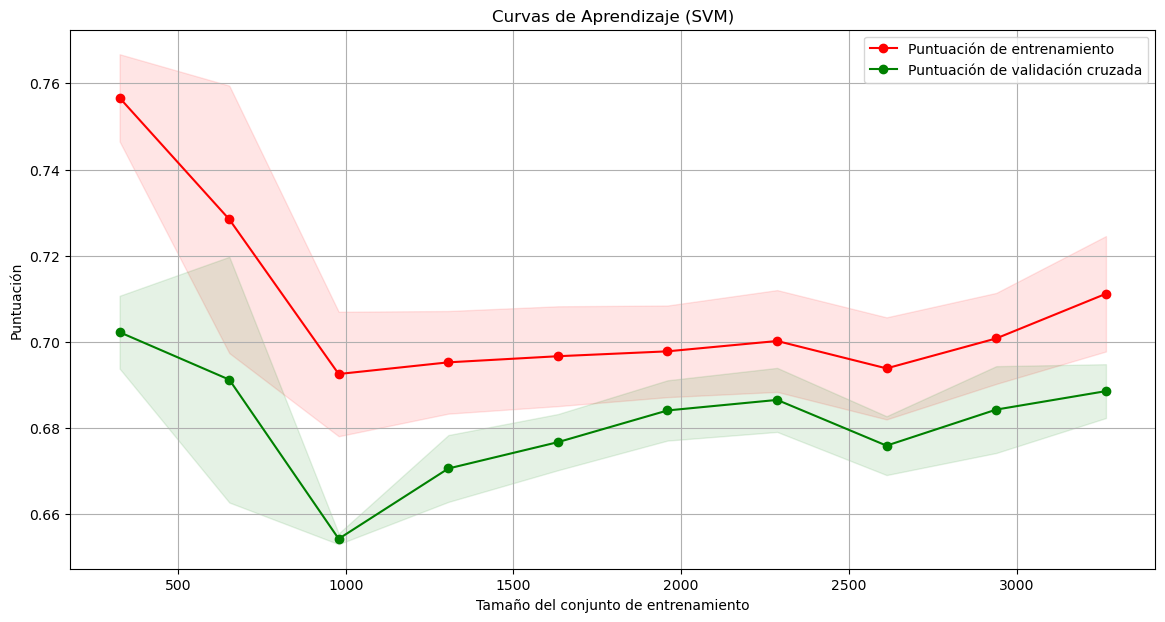

In [8]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
df = pd.read_csv('cardio_train.csv', sep=';')

# Dividir los datos en conjunto de entrenamiento y prueba
X = df.drop('cardio', axis=1)
y = df['cardio']
X, _, y, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construir un pipeline para el modelo SVM
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Definir la grilla de hiperparámetros para GridSearchCV
param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.1, 0.01, 0.001]
}

# Realizar búsqueda de hiperparámetros para SVM
svm_grid = GridSearchCV(svm_pipe, param_grid_svm, cv=3, error_score='raise')
try:
    svm_grid.fit(X_train, y_train)
    
    # Obtener los mejores hiperparámetros y el mejor modelo SVM
    best_params_svm = svm_grid.best_params_
    best_model_svm = svm_grid.best_estimator_
    
    # Guardar el mejor modelo SVM en un archivo
    import joblib
    joblib.dump(best_model_svm, 'best_model_svm.pkl')

    # Generar curvas de aprendizaje
    train_sizes, train_scores, valid_scores = learning_curve(
        best_model_svm, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=3, n_jobs=-1
    )

    # Calcular promedios y desviaciones estándar de las puntuaciones
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    # Visualizar las curvas de aprendizaje
    plt.figure(figsize=(14, 7))
    plt.title('Curvas de Aprendizaje (SVM)')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Puntuación')
    plt.grid()

    # Área sombreada para desviaciones estándar
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color="g")

    # Curvas de aprendizaje
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Puntuación de entrenamiento")
    plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Puntuación de validación cruzada")

    plt.legend(loc="best")
    plt.show()

except Exception as e:
    print("Error al ajustar SVM:", e)


